In [1]:
import fakedoocs as pydoocs
from simplebo import SimpleBO
from fakedoocs import rosenbrock
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
# load config
with open("conf/test_rosenbrock.json", "r") as f:
    config_dict = json.load(f)

In [3]:
# construct optimizer object
bo = SimpleBO(config_dict, readonly=False, acquisition="UCB", step_limit_type="hard")

In [4]:
# run optimizer
bo.max_steps = 100 # change opt. settings afterwards
bo.optimize()

In [5]:
xx, yy = np.meshgrid(np.linspace(bo.bounds[0,0], bo.bounds[1,0]),np.linspace(bo.bounds[0,1], bo.bounds[1,1]))
xin = np.stack([xx.flatten(), yy.flatten()]).T
zz = -np.array([rosenbrock(x) for x in xin]).reshape(xx.shape)

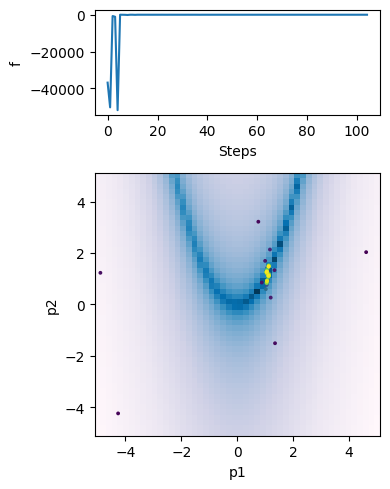

In [6]:
fig, axes = plt.subplots(2,1,height_ratios=[1,2.5], figsize=(4,5))
axes[0].plot(bo.Y.detach().numpy().flatten())
axes[0].set_xlabel("Steps")
axes[0].set_ylabel("f")
axes[1].pcolormesh(xx, yy, zz, norm=colors.LogNorm(vmin=zz.min(), vmax=zz.max()), cmap ='PuBu_r')
axes[1].scatter(bo.X[:,0], bo.X[:,1],s=3, c=list(range(len(bo.Y))))
axes[1].set_xlabel("p1")
axes[1].set_ylabel("p2")
fig.tight_layout()